In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import re

['data2021.csv', 'data2022.csv', 'data2023.csv']
2021: correlation = -0.078
2022: correlation = -0.078
2023: correlation = -0.089


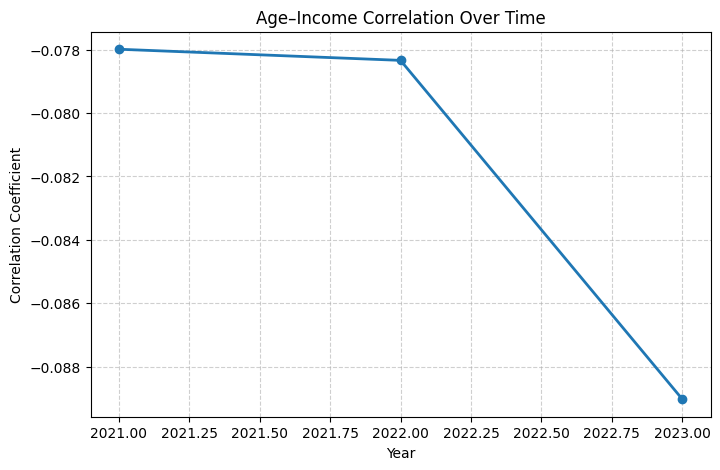

In [ ]:
#find files
files = glob.glob("data*.csv")
print(files)

year_corr = []

for file in files:
    #Extract the year from the filename (e.g., 2021 from "data_2021.csv")
    year = int(re.search(r'(\d{4})', file).group(1))
        # Read the file
    df = pd.read_csv(file)
    
    # Ensure numeric columns
    df['age'] = pd.to_numeric(df['age'], errors='coerce')
    df['income'] = pd.to_numeric(df['household_income'], errors='coerce')
    
    # Drop missing values
    df = df.dropna(subset=['age', 'household_income'])
    
    # Compute correlation
    corr = df['age'].corr(df['household_income'])
    
    year_corr.append((year, corr))
    print(f"{year}: correlation = {corr:.3f}")

# Step 2: Convert results to DataFrame and sort by year
corr_df = pd.DataFrame(year_corr, columns=['year', 'correlation']).sort_values('year')

# Step 3: Plot correlation over years
plt.figure(figsize=(8,5))
plt.plot(corr_df['year'], corr_df['correlation'], marker='o', linewidth=2)
plt.title('Age–Income Correlation Over Time')
plt.xlabel('Year')
plt.ylabel('Correlation Coefficient')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [1]:
# Fit a simple linear trend line
z = np.polyfit(corr_df['year'], corr_df['correlation'], 1)
p = np.poly1d(z)

plt.figure(figsize=(8,5))
plt.plot(corr_df['year'], corr_df['correlation'], 'o-', label='Observed correlation')
plt.plot(corr_df['year'], p(corr_df['year']), 'r--', label='Trend line')
plt.title('Age–Income Correlation Over Time')
plt.xlabel('Year')
plt.ylabel('Correlation Coefficient')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


NameError: name 'np' is not defined